In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import aquire
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = aquire.get_store_data()

In [3]:
#1 convert date to datetime
df.sale_date = pd.to_datetime(df.sale_date)


<AxesSubplot:>

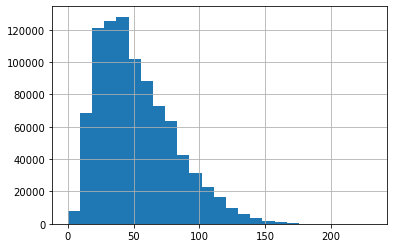

In [4]:
#2 plot distribution of sale_amount and item_price
df.sale_amount.hist(bins=25)

<AxesSubplot:>

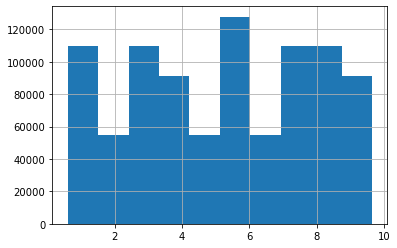

In [5]:
df.item_price.hist()

In [6]:
#3 Set index to datetime variable
df = df.set_index('sale_date')

In [7]:
#4 add month and week to dataframe
df['month'] = df.index.month
df['week']  = df.index.isocalendar().week

In [8]:
#5 sales total
df['sale_total'] = df.sale_amount * df.item_price

In [9]:
#6 make it reproducible
example = aquire.get_store_data()

In [10]:
example = aquire.feature_engineering()

In [11]:
#germany data 
df = aquire.get_germany()

In [12]:
#1 convert date  to datetime

In [13]:
df.Date = pd.to_datetime(df.Date)

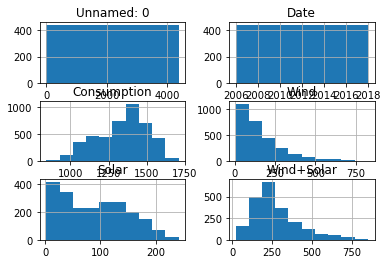

In [14]:
#2 plot distribution of each variable
df.hist()
plt.show()

In [15]:
#3 index to datetime
df = df.set_index('Date')

In [16]:
#4 add a month and year to your dataframe
df['month'] = df.index.month

In [17]:
df['year'] = df.index.year

In [21]:
#fill missing values
#lets see if any simple math can fill values
#are there an wind+solar rows empty that have values for wind and solar
df.loc[(df['Wind+Solar'].isna()) & ((df['Wind'] > 0) & (df['Solar'] >0))]

df.loc[(df['Wind+Solar'] != (df['Wind'] + df['Solar'])), 'Wind+Solar'] = (df['Wind'] + df['Solar'])

In [ ]:
#No, so we will fill with 0
df.Wind  = df.Wind.fillna(0)
df.Solar = df.Solar.fillna(0)
df['Wind+Solar'] = df['Wind+Solar'].fillna(0)

In [ ]:
#6 make it repoducealble 
new = aquire.get_germany()
new = aquire.prep_germany(new)